In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
# If the observations are in a dataframe, you can use statsmodels.formulas.api to do the regression instead
from statsmodels import regression
import matplotlib.pyplot as plt
from utils import *

In [2]:
datadir = "/root/codespace/quant-finance-lectures/amarstock_adjusted_data/daily"
print(get_top20_stocks(path=datadir))

[('00DS30', 3084026774000.0), ('00DSES', 2132060774800.0), ('00DSEX', 3370925421616.0), ('1JANATAMF', 233585572.0), ('1STPRIMFMF', 332978314.0), ('AAMRANET', 148017730.0), ('AAMRATECH', 683394625.0), ('ABB1STMF', 256367920.0), ('ABBANK', 769581974.0), ('ACFL', 104802917.0), ('ACI', 94419722.0), ('ACIFORMULA', 126512844.0), ('ACMELAB', 53292422.0), ('ACTIVEFINE', 848206734.0), ('ADNTEL', 51799485.0), ('ADVENT', 237026778.0), ('AFCAGRO', 336544932.0), ('AFTABAUTO', 297630571.0), ('AGNISYSL', 567261957.0), ('AGRANINS', 25712648.0)]


In [4]:
# Load pricing data for two arbitrarily-chosen assets and ACI
stockname1, stockname2, stockname3 = 'ADVENT', 'AGRANINS', 'ACI'
df1, df2, df3 = get_prices(stockname1, path=datadir), get_prices(stockname2, path=datadir), get_prices(stockname3, path=datadir)

asset1 = df1.close
asset2 = df2.close
benchmark = df3.close
slr = regression.linear_model.OLS(asset1, sm.add_constant(asset2)).fit()
print('SLR beta of asset2:', slr.params[1])

SLR beta of asset2: 0.32416736464985


In [5]:
# Run multiple linear regression using asset2 and SPY as independent variables
mlr = regression.linear_model.OLS(asset1, sm.add_constant(np.column_stack((asset2, benchmark)))).fit()

prediction = mlr.params[0] + mlr.params[1]*asset2 + mlr.params[2]*benchmark
prediction.name = 'Prediction'

print('MLR beta of asset2:', mlr.params[1], '\nMLR beta of S&P 500:', mlr.params[2])

MLR beta of asset2: -0.3606298377476334 
MLR beta of S&P 500: -0.03511969658891807


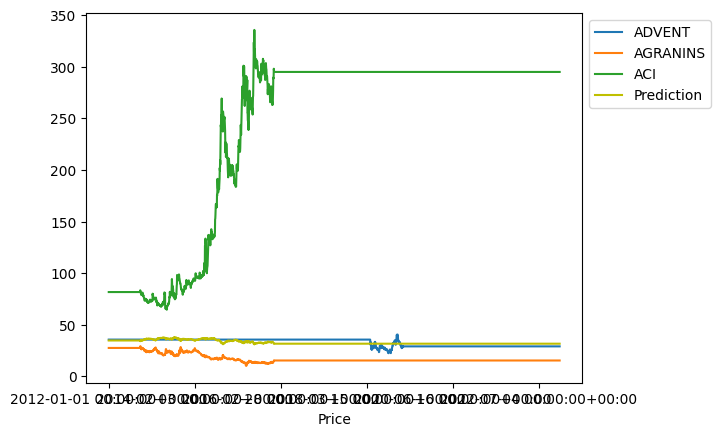

In [7]:
# Plot the three variables along with the prediction given by the MLR
asset1.plot(label=stockname1)
asset2.plot(label=stockname2)
benchmark.plot(label=stockname3)
prediction.plot(color='y')
plt.xlabel('Price')
plt.legend(bbox_to_anchor=(1,1), loc=2);

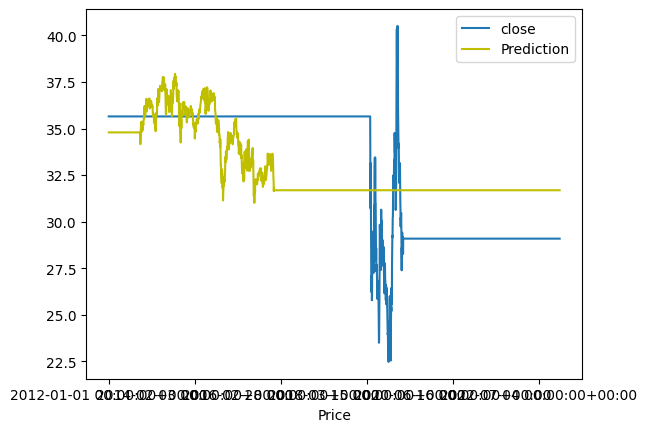

In [8]:
# Plot only the dependent variable and the prediction to get a closer look
asset1.plot()
prediction.plot(color='y')
plt.xlabel('Price')
plt.legend();

### Evaluation.

In [9]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     526.7
Date:                Tue, 18 Oct 2022   Prob (F-statistic):          5.92e-193
Time:                        23:48:22   Log-Likelihood:                -6485.3
No. Observations:                2621   AIC:                         1.298e+04
Df Residuals:                    2618   BIC:                         1.299e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.6022      0.962     49.498      0.000      45.716      49.488
x1            -0.3606      0.034    -10.579      0.000      -0.427      -0.294
x2            -0.0351      0.002    -21.886      0.000      -0.038      -0.032
==============================================================================
Omnibus:                      314.006   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.706
Skew:                           0.125   Prob(JB):                     3.32e-20
Kurtosis:                       2.129   Cond. No.                     4.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""